In [1]:
# Importing required libraries
import pandas as pd

# Loading the CSV file
file_path = 'benchmark_reqa.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure
data.head(10)

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,NaN,0.0,0.116247,0.477443,0.572516,0.251270
1,iapp,th_aug,0.1,0.157643,0.473055,0.550365,0.278882
2,iapp,th_aug,0.2,0.190922,0.471009,0.532918,0.301396
3,iapp,th_aug,0.3,0.221250,0.469277,0.518455,0.321791
4,iapp,th_aug,0.4,0.247869,0.469277,0.506739,0.340617
5,iapp,th_aug,0.5,0.273711,0.471824,0.499861,0.359451
6,iapp,th_aug,0.6,0.293934,0.473835,0.493621,0.374562
7,iapp,th_aug,0.7,0.313424,0.482147,0.495874,0.390950
8,iapp,th_aug,0.8,0.328985,0.487765,0.496719,0.403899
9,iapp,th_aug,0.9,0.343940,0.494477,0.499232,0.416922


In [2]:
data["augment_col"].unique()

array([nan, 'th_aug', 'th_fasttext_aug', 'th_llm_gec_aug',
       'th_llm_paraphrase_aug', 'th_ltw2v_aug', 'th_qcpg_0.2_aug',
       'th_qcpg_0.2_llm_gec_aug', 'th_qcpg_0.5_aug',
       'th_qcpg_0.5_llm_gec_aug', 'th_qcpg_0.8_aug',
       'th_qcpg_0.8_llm_gec_aug', 'th_thai2fit_aug', 'th_thai2trans_aug',
       'th_wordnet_aug'], dtype=object)

In [3]:
# For each unique source get the highest scoring top_1
data.groupby(['source'])['top_1'].max()

source
iapp      0.356384
thaiqa    0.405876
tydiqa    0.352536
xquad     0.224852
Name: top_1, dtype: float64

In [4]:
data[data["augment_col"].isna()].groupby(['source'])['top_1'].max()

source
iapp      0.116247
thaiqa    0.268823
tydiqa    0.267743
xquad     0.166949
Name: top_1, dtype: float64

In [5]:
data["augment_col"] = data["augment_col"].fillna("original")

In [6]:
pretty_names = {
    "th_qcpg_0.8_llm_gec_aug": "QCPG (0.8) + LLM GEC",
    "th_qcpg_0.5_llm_gec_aug": "QCPG (0.5) + LLM GEC",
    "th_qcpg_0.2_llm_gec_aug": "QCPG (0.2) + LLM GEC",
    "th_qcpg_0.8_aug": "QCPG (0.8)",
    "th_qcpg_0.5_aug": "QCPG (0.5)",
    "th_qcpg_0.2_aug": "QCPG (0.2)",
    "th_aug": "Backtranslation",
    "th_fasttext_aug": "FastText",
    "th_llm_gec_aug": "LLM GEC",
    "th_llm_paraphrase_aug": "LLM Paraphrase",
    "th_ltw2v_aug": "LTW2Vec",
    "th_thai2fit_aug": "Thai2Fit",
    "th_wordnet_aug": "WordNet",
}

In [7]:
# Function to extract the augmentation ratio from the name
def get_augment_ratio(name):
    if name == "original":
        return "N/A" # Not applicable for the original model
    return name

# Function to extract the pretty name (augmentation name without ratio) from the name
def get_pretty_name(name):
    if name == "original":
        return "Original"
    return pretty_names[name]


In [9]:
# Remove th_thai2trans_aug
data = data[data["augment_col"] != "th_thai2trans_aug"]
data

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,original,0.0,0.116247,0.477443,0.572516,0.251270
1,iapp,th_aug,0.1,0.157643,0.473055,0.550365,0.278882
2,iapp,th_aug,0.2,0.190922,0.471009,0.532918,0.301396
3,iapp,th_aug,0.3,0.221250,0.469277,0.518455,0.321791
4,iapp,th_aug,0.4,0.247869,0.469277,0.506739,0.340617
...,...,...,...,...,...,...,...
559,tydiqa,th_wordnet_aug,0.6,0.304305,0.513277,0.565232,0.399801
560,tydiqa,th_wordnet_aug,0.7,0.309652,0.511392,0.556487,0.402412
561,tydiqa,th_wordnet_aug,0.8,0.312909,0.508895,0.547666,0.403701
562,tydiqa,th_wordnet_aug,0.9,0.318847,0.509804,0.543167,0.407987


In [10]:
unique_sources = data["source"].unique()
source_scores = {}

for source in unique_sources:

    # Find the best performing model for each augmentation type based on the "test_exact_match" metric
    # best_models = data.loc[data.groupby('augment_col')['top_1'].idxmax()]
    # = data[data["source"] == source].groupby(['augment_col'])['top_1'].max()

    filtered_data = data[data["source"] == source]
    best_models = filtered_data.loc[filtered_data.groupby('augment_col')['top_1'].idxmax()]

    # Resetting the index
    best_models.reset_index(drop=True, inplace=True)

    best_models['pretty_name'] = best_models['augment_col'].apply(get_pretty_name)

    source_scores[source] = best_models.copy()

source_scores

{'iapp':    source              augment_col  augment_ratio     top_1     top_5  \
 0    iapp                 original            0.0  0.116247  0.477443   
 1    iapp                   th_aug            1.0  0.356269  0.500556   
 2    iapp          th_fasttext_aug            1.0  0.356005  0.499723   
 3    iapp           th_llm_gec_aug            1.0  0.356384  0.500174   
 4    iapp    th_llm_paraphrase_aug            1.0  0.355965  0.499792   
 5    iapp             th_ltw2v_aug            1.0  0.335102  0.492343   
 6    iapp          th_qcpg_0.2_aug            1.0  0.356149  0.500035   
 7    iapp  th_qcpg_0.2_llm_gec_aug            1.0  0.356218  0.500104   
 8    iapp          th_qcpg_0.5_aug            1.0  0.356268  0.500173   
 9    iapp  th_qcpg_0.5_llm_gec_aug            1.0  0.356312  0.500138   
 10   iapp          th_qcpg_0.8_aug            1.0  0.355906  0.500069   
 11   iapp  th_qcpg_0.8_llm_gec_aug            1.0  0.356089  0.500035   
 12   iapp          th_thai2fi

In [11]:
# Multiply by 100 to get the percentage
for source in source_scores:
    source_scores[source]["top_1"] = source_scores[source]["top_1"] * 100
    source_scores[source]["top_5"] = source_scores[source]["top_5"] * 100
    source_scores[source]["top_10"] = source_scores[source]["top_10"] * 100
    source_scores[source]["mrr_score"] = source_scores[source]["mrr_score"] * 100

source_scores

{'iapp':    source              augment_col  augment_ratio      top_1      top_5  \
 0    iapp                 original            0.0  11.624689  47.744257   
 1    iapp                   th_aug            1.0  35.626911  50.055602   
 2    iapp          th_fasttext_aug            1.0  35.600499  49.972295   
 3    iapp           th_llm_gec_aug            1.0  35.638409  50.017357   
 4    iapp    th_llm_paraphrase_aug            1.0  35.596508  49.979216   
 5    iapp             th_ltw2v_aug            1.0  33.510235  49.234268   
 6    iapp          th_qcpg_0.2_aug            1.0  35.614921  50.003460   
 7    iapp  th_qcpg_0.2_llm_gec_aug            1.0  35.621842  50.010381   
 8    iapp          th_qcpg_0.5_aug            1.0  35.626774  50.017305   
 9    iapp  th_qcpg_0.5_llm_gec_aug            1.0  35.631229  50.013843   
 10   iapp          th_qcpg_0.8_aug            1.0  35.590638  50.006924   
 11   iapp  th_qcpg_0.8_llm_gec_aug            1.0  35.608946  50.003462   
 12 

In [12]:
data[data["source"] == "iapp"]

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,original,0.0,0.116247,0.477443,0.572516,0.251270
1,iapp,th_aug,0.1,0.157643,0.473055,0.550365,0.278882
2,iapp,th_aug,0.2,0.190922,0.471009,0.532918,0.301396
3,iapp,th_aug,0.3,0.221250,0.469277,0.518455,0.321791
4,iapp,th_aug,0.4,0.247869,0.469277,0.506739,0.340617
...,...,...,...,...,...,...,...
136,iapp,th_wordnet_aug,0.6,0.245052,0.474229,0.515623,0.340286
137,iapp,th_wordnet_aug,0.7,0.262298,0.475596,0.509416,0.352179
138,iapp,th_wordnet_aug,0.8,0.277113,0.475879,0.503406,0.362431
139,iapp,th_wordnet_aug,0.9,0.292304,0.479279,0.502077,0.374232


In [13]:
source_scores["iapp"]

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score,pretty_name
0,iapp,original,0.0,11.624689,47.744257,57.251591,25.126983,Original
1,iapp,th_aug,1.0,35.626911,50.055602,50.097303,42.822789,Backtranslation
2,iapp,th_fasttext_aug,1.0,35.600499,49.972295,49.972295,42.783511,FastText
3,iapp,th_llm_gec_aug,1.0,35.638409,50.017357,50.059015,42.820023,LLM GEC
4,iapp,th_llm_paraphrase_aug,1.0,35.596508,49.979216,49.993072,42.784937,LLM Paraphrase
5,iapp,th_ltw2v_aug,1.0,33.510235,49.234268,49.931766,40.969066,LTW2Vec
6,iapp,th_qcpg_0.2_aug,1.0,35.614921,50.003460,50.010381,42.809191,QCPG (0.2)
7,iapp,th_qcpg_0.2_llm_gec_aug,1.0,35.621842,50.010381,50.010381,42.814036,QCPG (0.2) + LLM GEC
8,iapp,th_qcpg_0.5_aug,1.0,35.626774,50.017305,50.017305,42.818809,QCPG (0.5)
9,iapp,th_qcpg_0.5_llm_gec_aug,1.0,35.631229,50.013843,50.013843,42.820460,QCPG (0.5) + LLM GEC


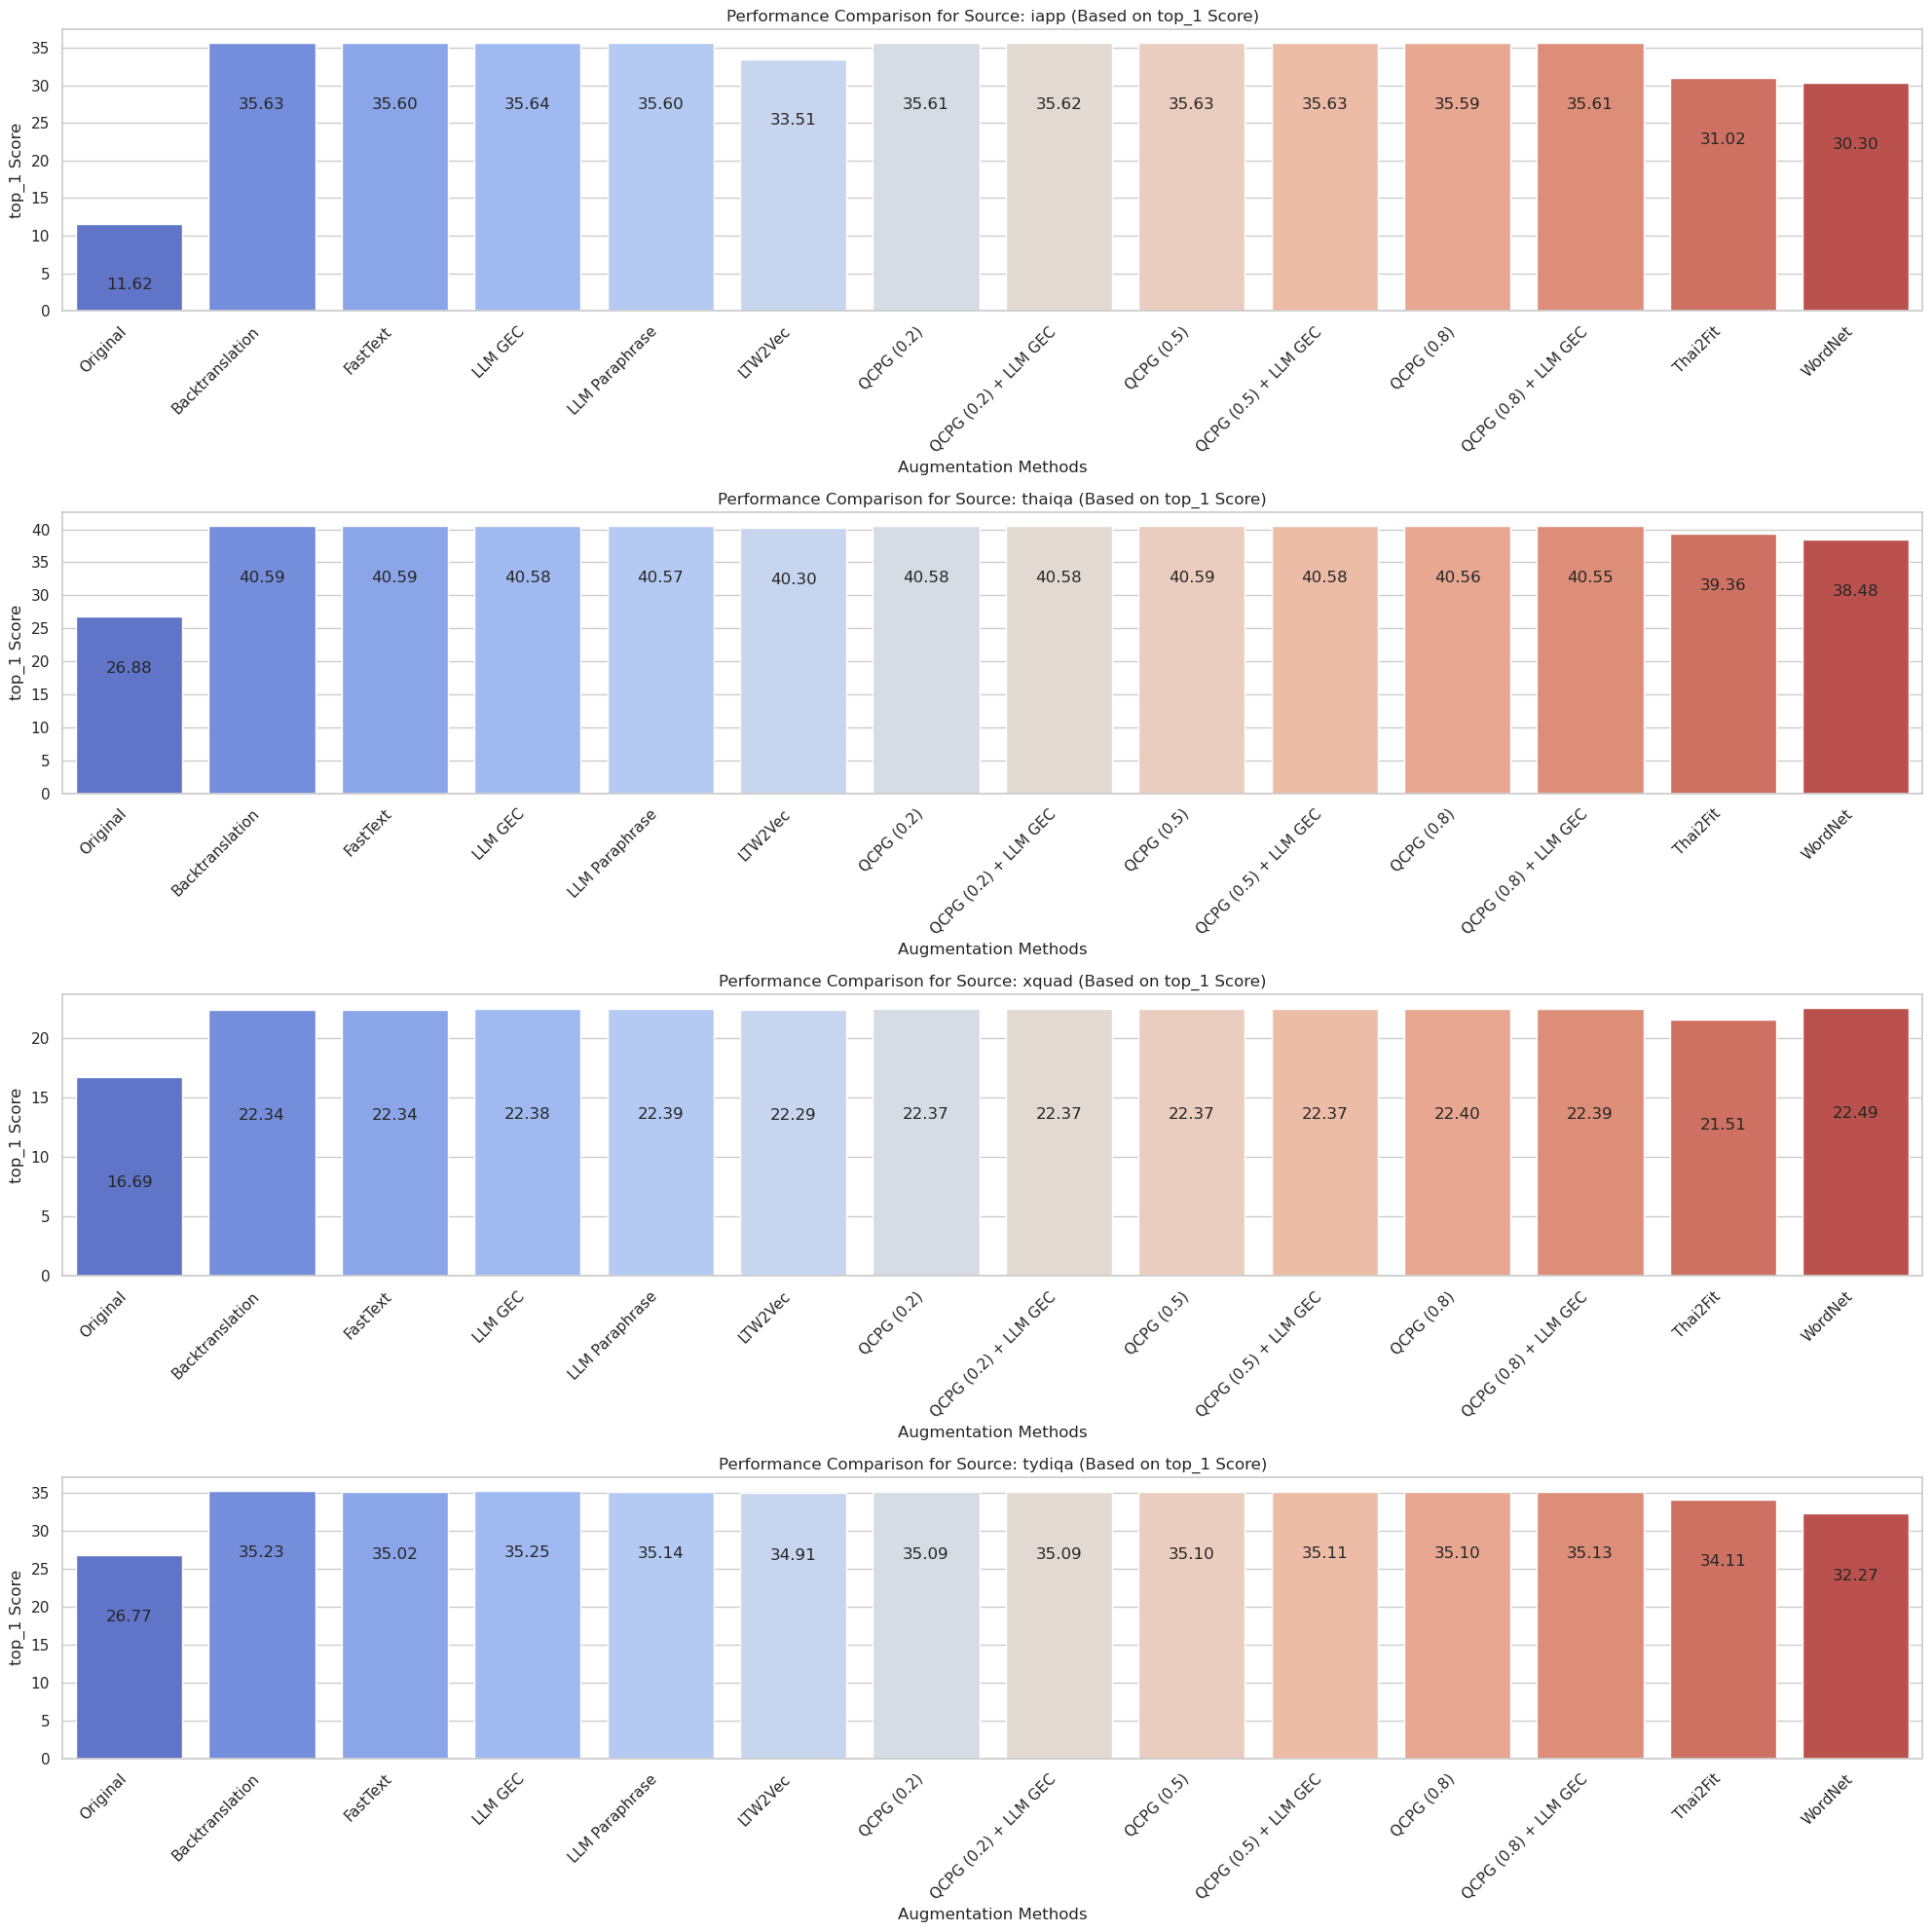

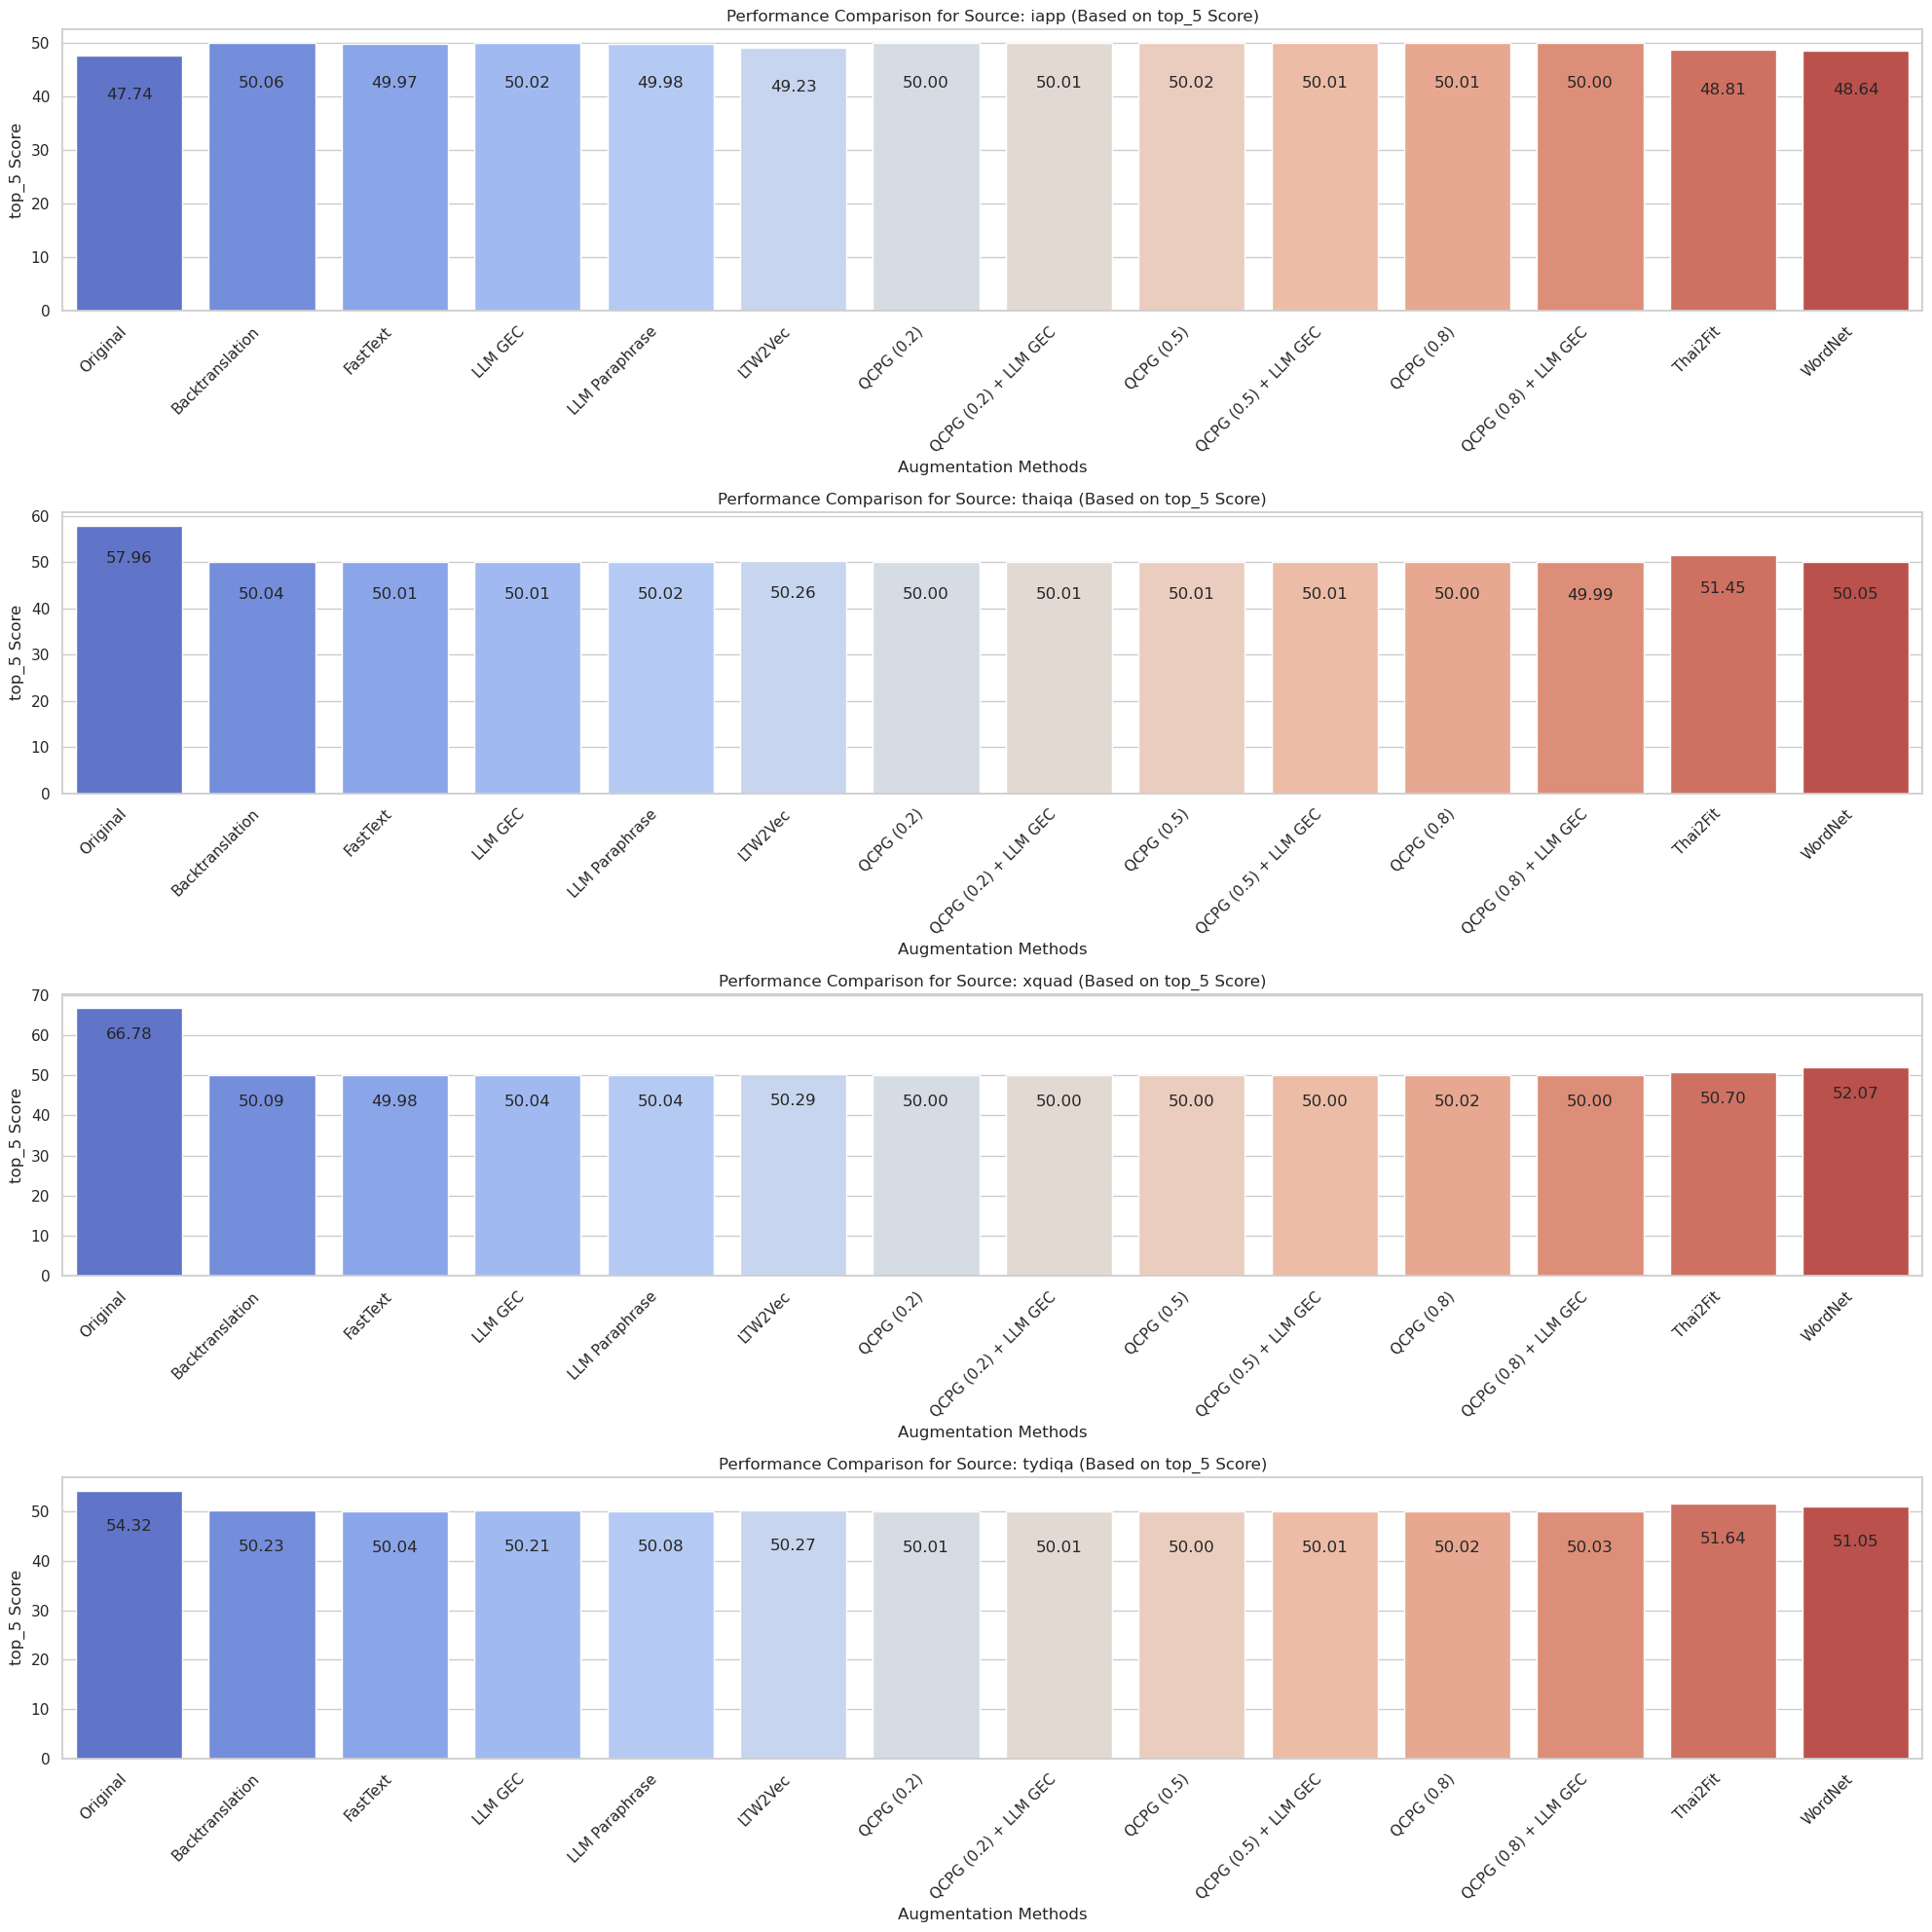

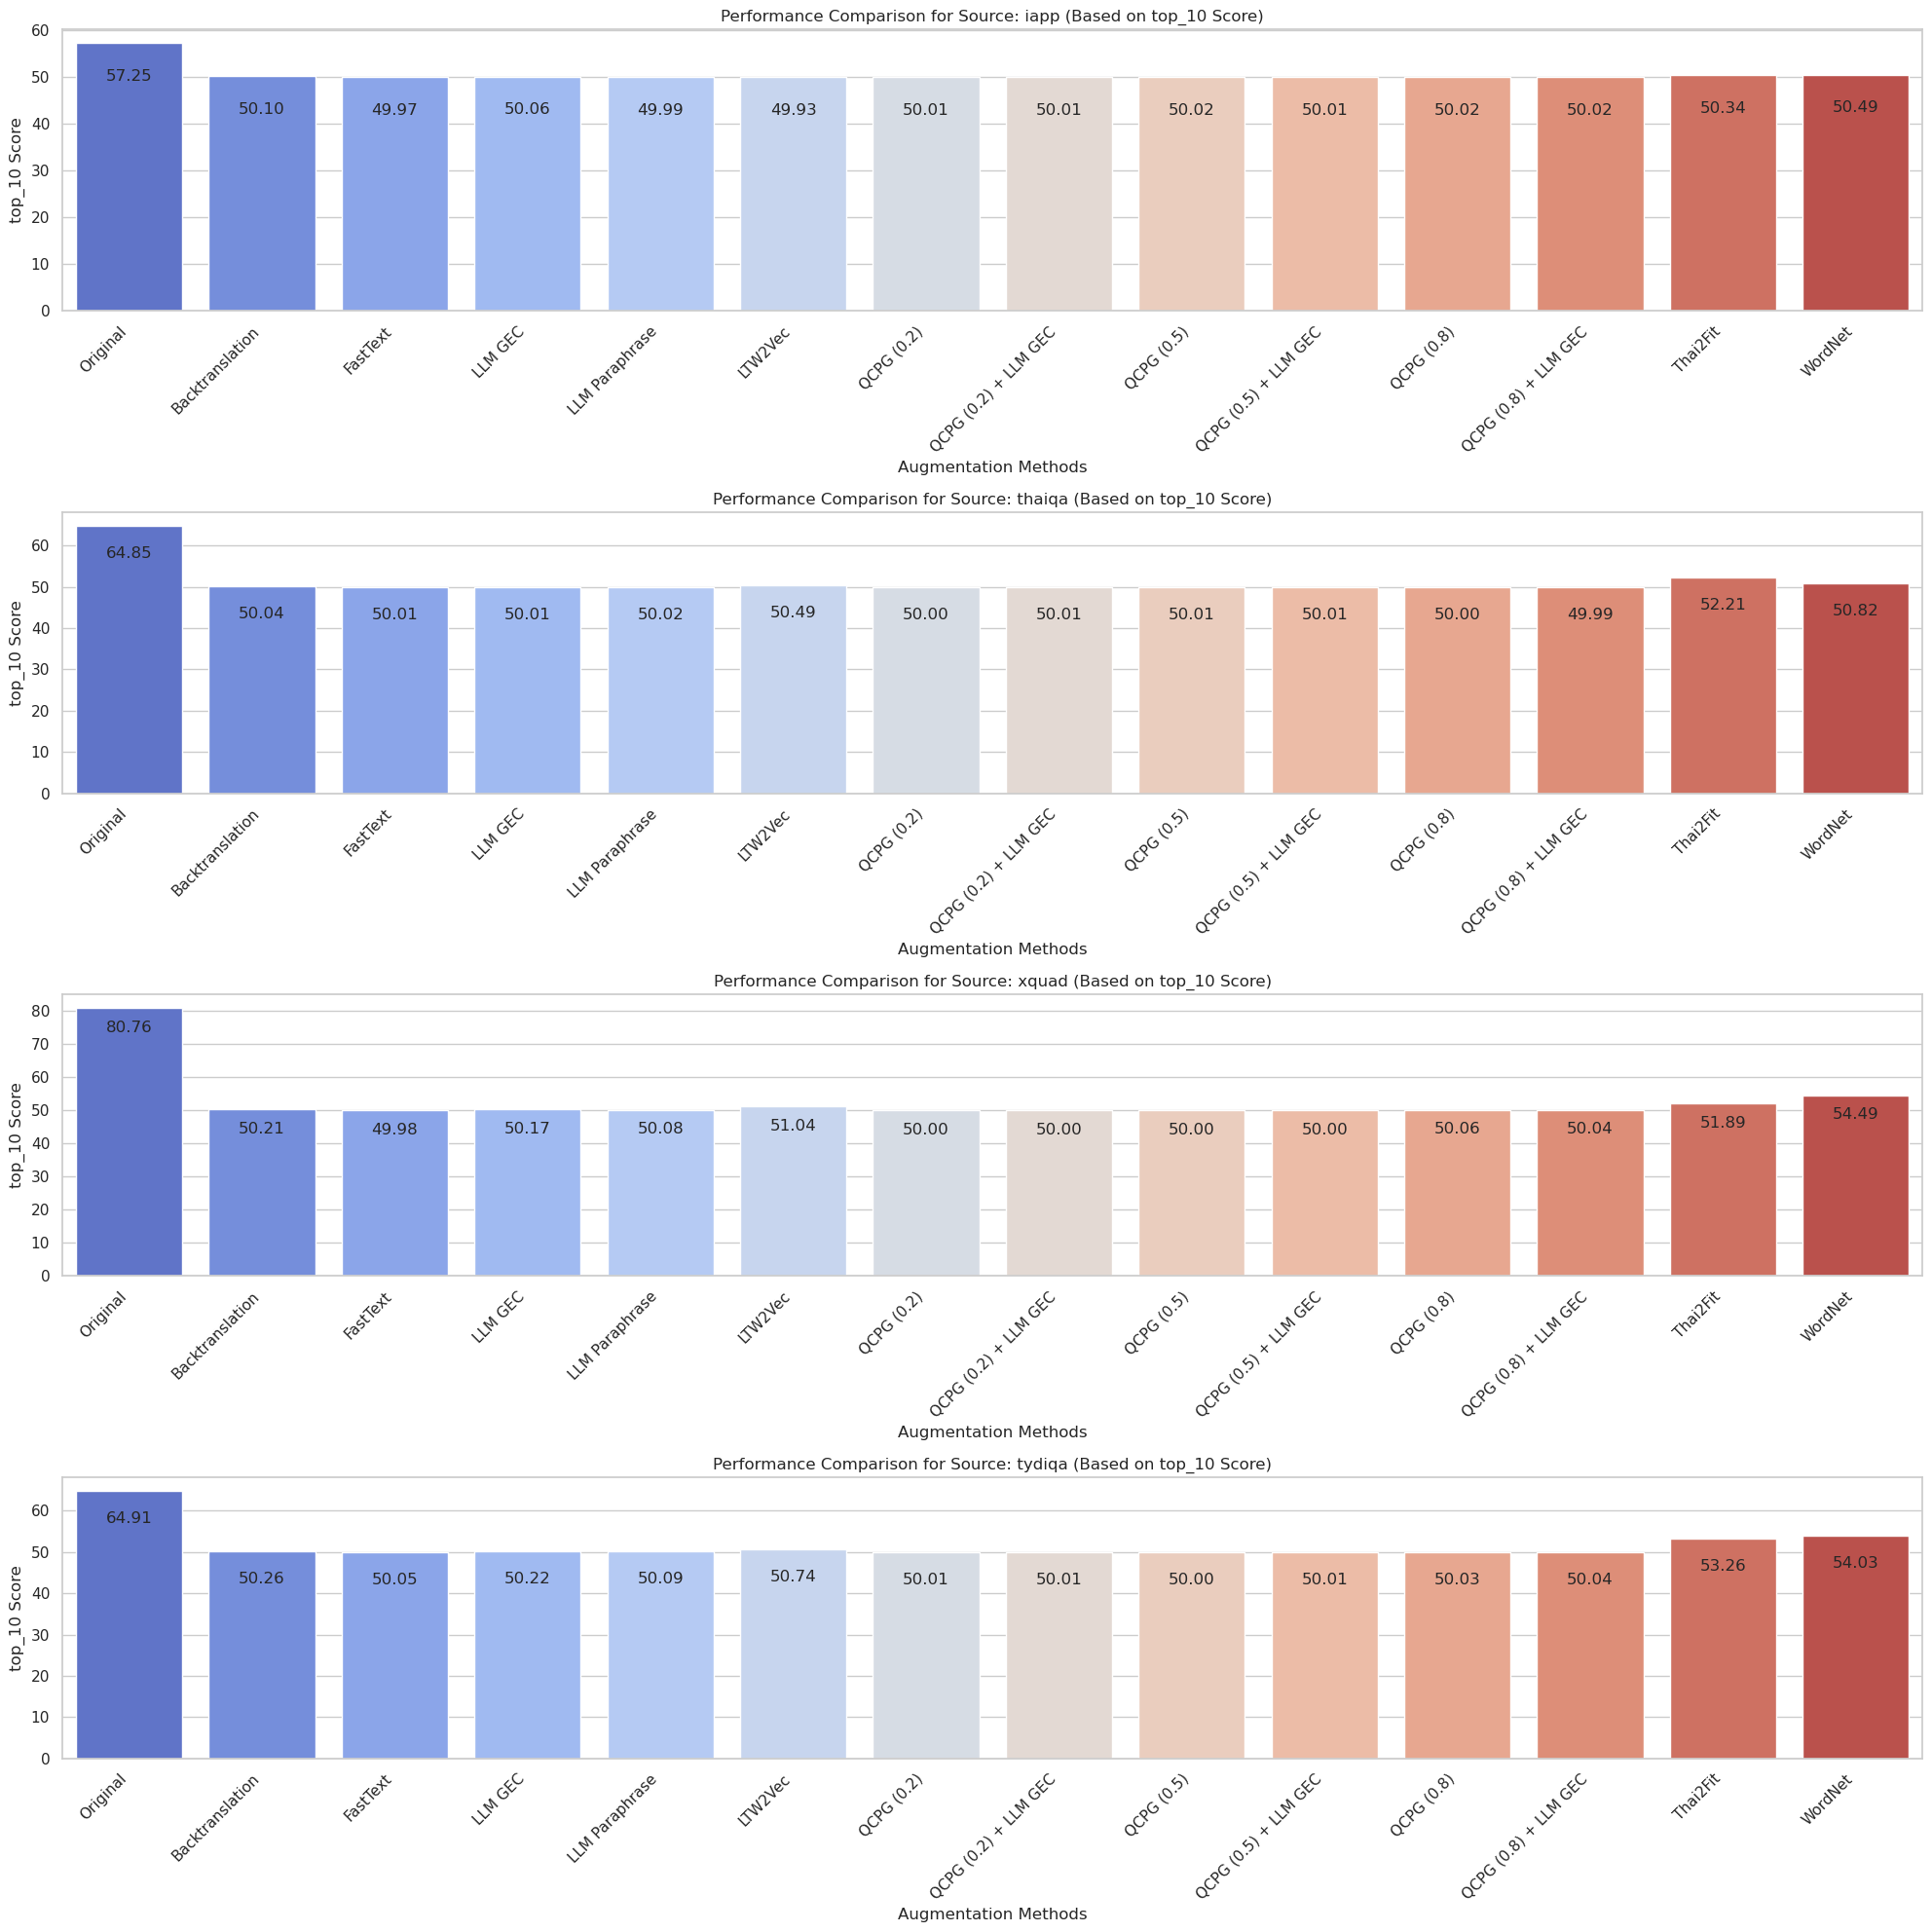

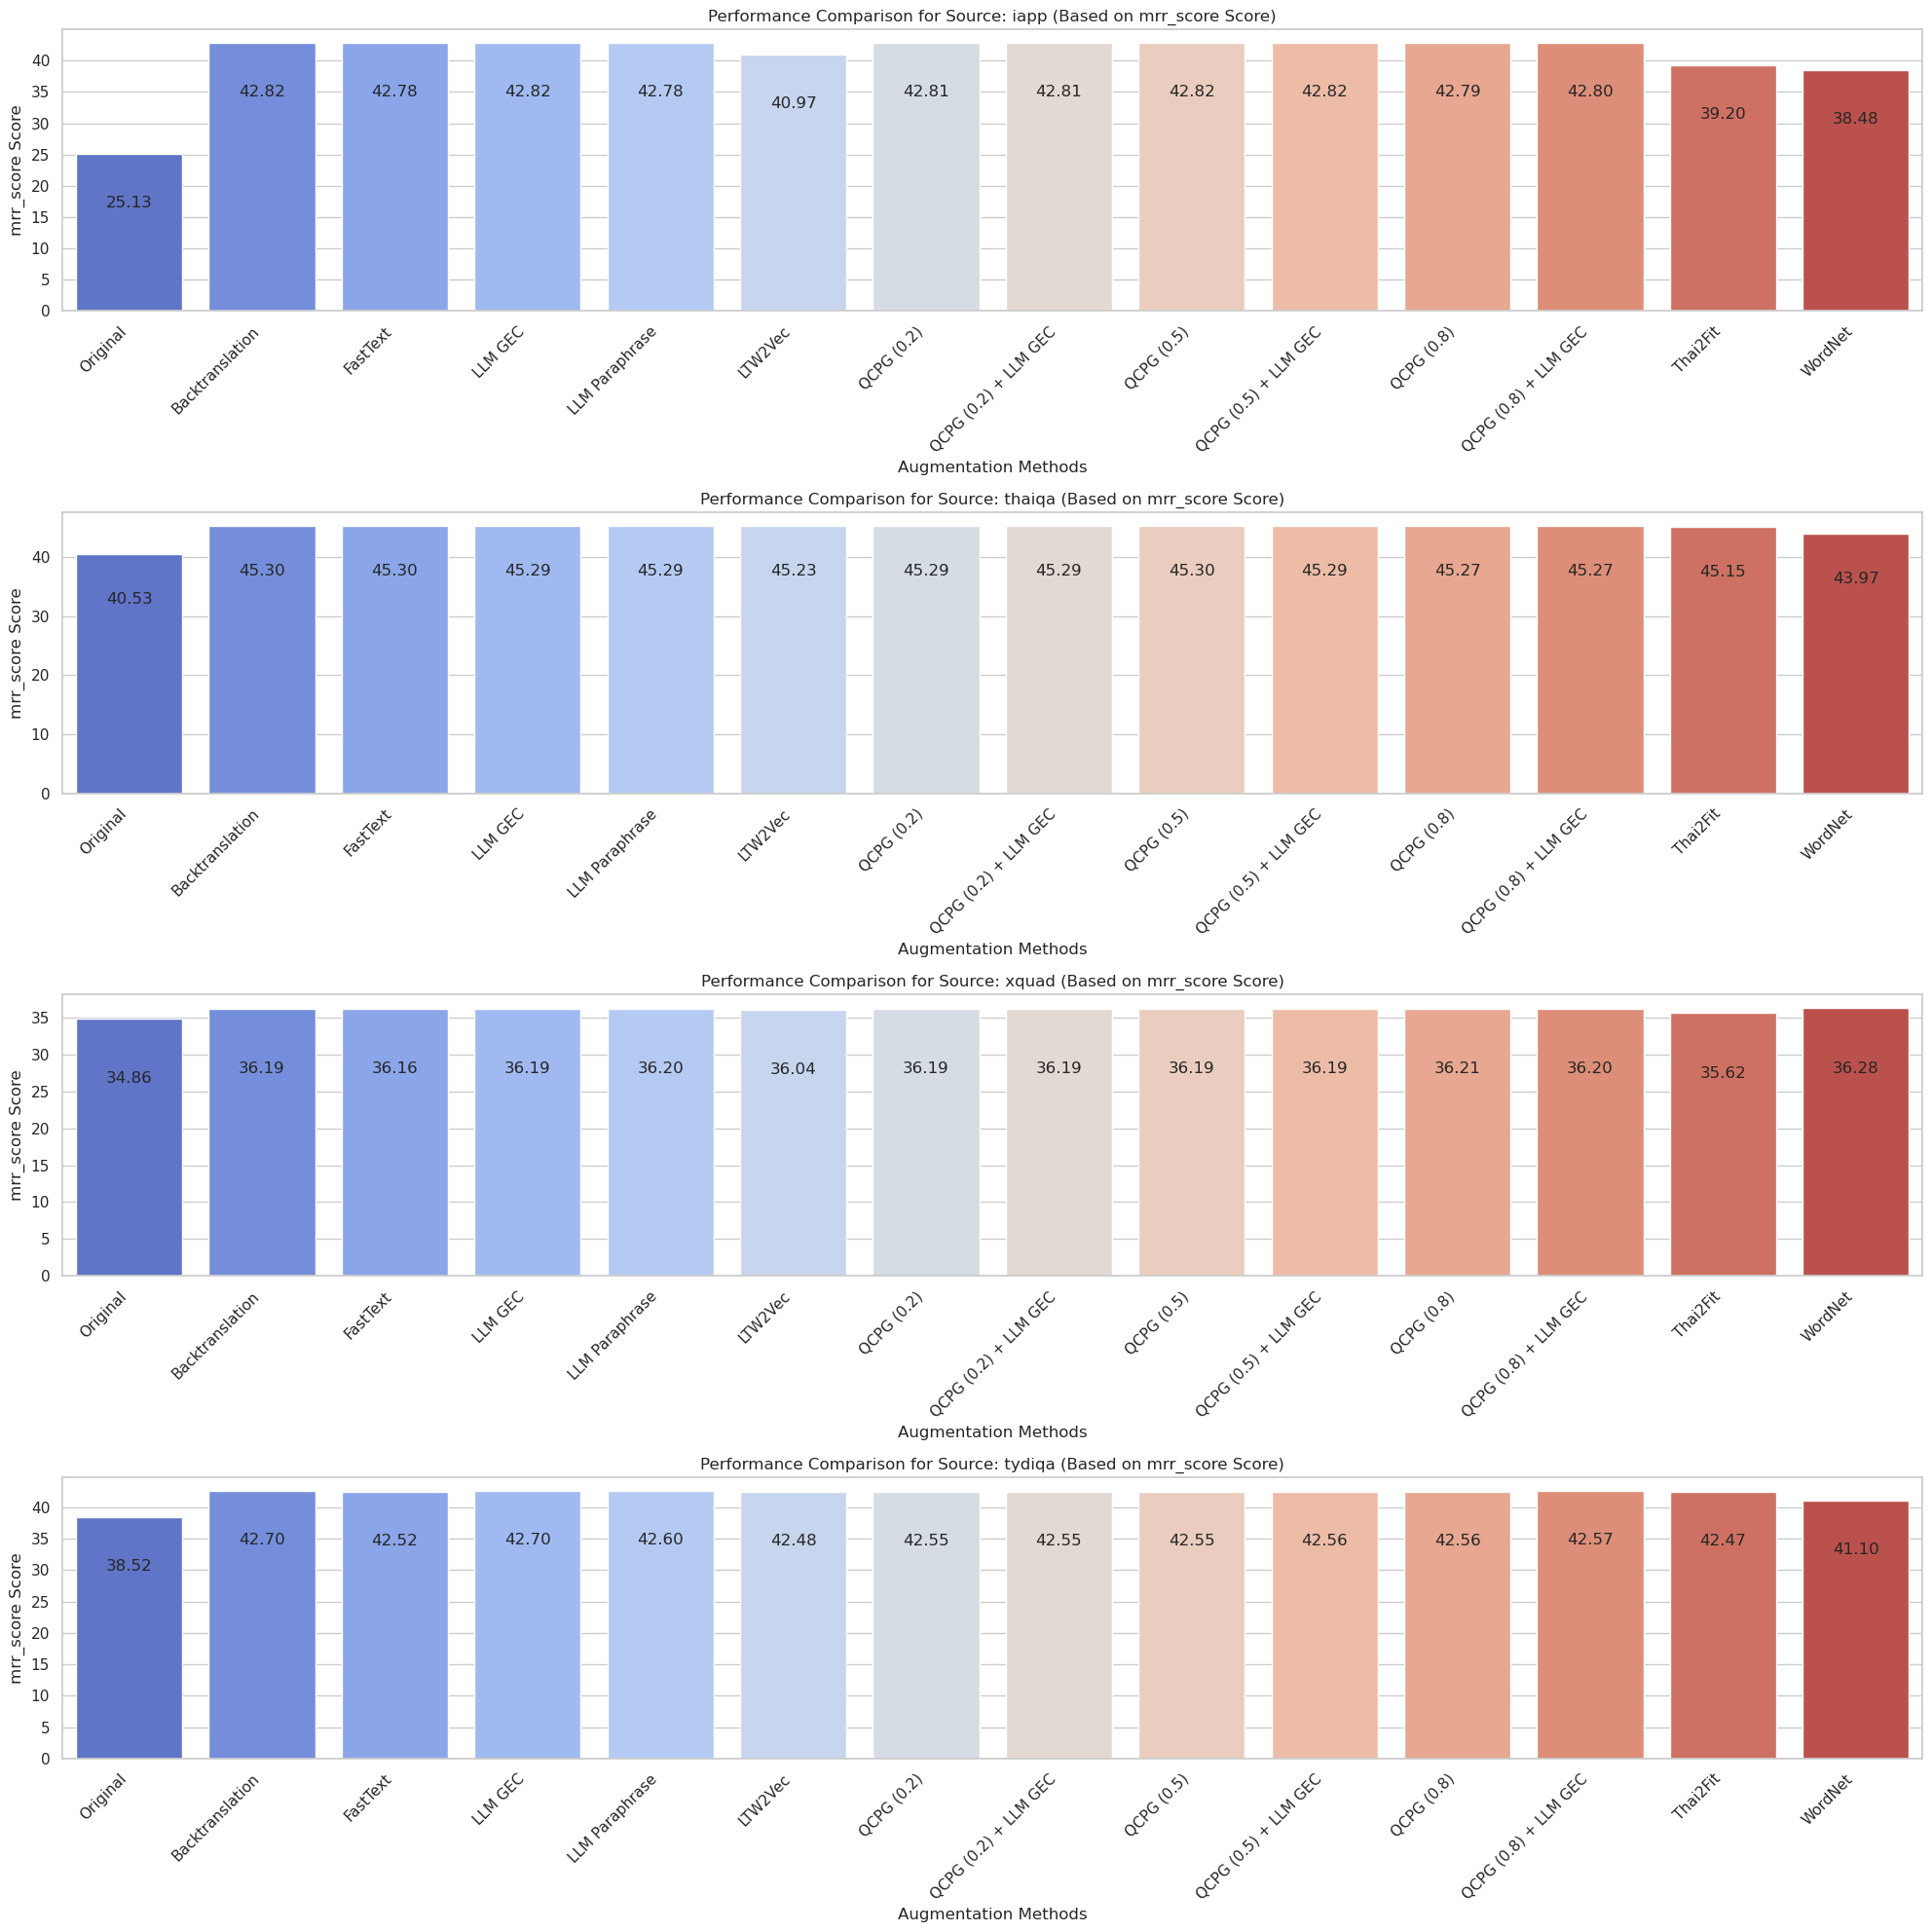

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_theme(style="whitegrid")

# Initialize the figure


# for index, (source, best_models_df) in enumerate(source_scores.items()):
#     plt.subplot(len(source_scores), 1, index + 1)
    
#     # Create a barplot for the 'top_1' metric
#     sns.barplot(data=best_models_df, x='pretty_name', y='top_1', palette='coolwarm')
    
#     # Add labels and title
#     plt.xlabel('Augmentation Methods')
#     plt.ylabel('Top-1 Score')
#     plt.title(f'Performance Comparison for Source: {source} (Based on Top-1 Score)')
#     plt.xticks(rotation=45, ha='right')
    
#     # Annotate each bar with the respective value
#     for p in plt.gca().patches:
#         plt.gca().annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() - 10),
#                             ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Loop through each source to create a separate plot
for score in ['top_1', 'top_5', 'top_10', 'mrr_score']:
    plt.figure(figsize=(20, 20))
    for index, (source, best_models_df) in enumerate(source_scores.items()):
        plt.subplot(len(source_scores), 1, index + 1)
        
        # Create a barplot for the 'top_1' metric
        sns.barplot(data=best_models_df, x='pretty_name', y=score, palette='coolwarm')
        
        # Add labels and title
        plt.xlabel('Augmentation Methods')
        plt.ylabel(f'{score} Score')
        plt.title(f'Performance Comparison for Source: {source} (Based on {score} Score)')
        plt.xticks(rotation=45, ha='right')
        
        # Annotate each bar with the respective value
        for p in plt.gca().patches:
            plt.gca().annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() - 10),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
    
    plt.tight_layout()
    plt.show()

In [18]:
data.head(50)

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,original,0.0,0.455300,0.524633,0.595212,0.483870
1,iapp,th_aug,0.0,0.414476,0.460006,0.532660,0.437138
2,iapp,th_aug,0.1,0.454193,0.521312,0.589676,0.481763
3,iapp,th_aug,0.2,0.453640,0.517714,0.583449,0.479971
4,iapp,th_aug,0.3,0.452117,0.513701,0.578605,0.477557
5,iapp,th_aug,0.4,0.447135,0.506504,0.571270,0.471900
6,iapp,th_aug,0.5,0.443537,0.495710,0.563797,0.467038
7,iapp,th_aug,0.6,0.441877,0.492250,0.560199,0.464928
8,iapp,th_aug,0.7,0.436341,0.486576,0.554664,0.459293
9,iapp,th_aug,0.8,0.434542,0.484916,0.552726,0.457484
